
# Lecture V: EXERCISES

----

## Exercise 1

Programm a script that creates a file containing the following message:
```
Hi!  
This is the last session of the python introductory course.  
We hope you have enjoyed it!
```
Afterwards, the programm must print the lines one by one, adding the line number at the beggining of them and the number of words of each one at the end.

#### Possible solution

In [1]:
fileHandle = open("file_1.txt", "w")
fileHandle.write("Hi!\n")
fileHandle.write("This is the last session of the python introductory course.\n")
fileHandle.close()

#Just to see how append mode works, not necessary:
fileHandle = open("file_1.txt", "a") 
fileHandle.write("We hope you have enjoyed it!\n")
fileHandle.close()

#Now we print the text.
fileHandle = open("file_1.txt", "r")
for i,line in enumerate(fileHandle):
    print(str(i) + " " + line[:-1] + " " + str(line.count(' ')+1) )

fileHandle.close()

0 Hi! 1
1 This is the last session of the python introductory course. 10
2 We hope you have enjoyed it! 6


Note that we have to use $\textit{line[:-1]}$ to avoid printing the jump-line character of each line, as the loop automatically prints line by line the text.

## Exercise 2.1 : Encrypt Text using Caesar Cipher

Create a script containing a function `file_coder()` that receives three parameters passed as input by the user: the name of both the file we we want to codify and the one we want to save the result in, in string format, and an integer number. 

The goal of this function is to encrypt the information in the input file and save the result in the output file, name of which will be passed as argument by the user. The method that you should use is the simple classical  $\textit{Caesar cipher}$, which consists of changing all characters by another one some fixed number of positions down the alphabet we are working with, in this case ASCII code. 

The script will have to make sure that the arguments are valid, so that making sure they are in the correct format and making sure that such an input file indeed exits. If not, the programm will have to ask again for the arguments.


**Note**: Remember that in the end everything in your computer is saved as binarized numbers, 1-s or 0-s. As such, text or characters, must also be saved as numbers. As explained in the lecture, one of the classical encodings used to code each character of text into a number is the so called ASCII encoding. Here, for instance 'A' is saved as number 65 (in its binary representation of course), 'B' as 66 etc. You can find the dictionary below. In Python, in order to know the ASCII number for a character, say 'A' you can use the function `ord('A')`. On the other hand, if you need to convert an integer into its corresponding character, like 65 into 'A', you can use `chr(65)`.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/ASCII-Table-wide.svg/875px-ASCII-Table-wide.svg.png" alt="Drawing" style="width: 600px;"/>



#### Possible solution

Definition of function:

In [2]:
def file_cipher(infile, key, outfile):
    if type(infile)!=str or type(key)!=int or type(outfile)!=str:
        print("\nError! Input arguments are invalid!\n")
        return 1 # Error code is 1
    
    infileHandle = open(infile, "r")
    outfileHandle = open(outfile, "w")
    
    for line in infileHandle:
        for char in line[:-1]:
            outfileHandle.write(chr(ord(char)+key))
        
        outfileHandle.write('\n')
    
    infileHandle.close()
    outfileHandle.close()
    return 0 # everything okay

Function call:

In [3]:
error=1
while error!=0:
    name_of_infile = input("Enter plain text input file name:")
    num_pos = int(input("Enter number of positions:"))
    name_of_outfile = input("Enter desired output encrypted text file name:")

    try:
        error = file_cipher(infile = name_of_infile, key = num_pos, outfile = name_of_outfile)

    except IOError:
        print("\nInput file not found!\n")

print("\nEncrypted text file:\n")
with open(name_of_outfile, 'r') as reader:    
    print(reader.read())

Enter plain text input file name:file_1.txt
Enter number of positions:7
Enter desired output encrypted text file name:ciphered_file_1.txt

Encrypted text file:

Op(
[opz'pz'{ol'shz{'zlzzpvu'vm'{ol'w{ovu'pu{yvk|j{vy'jv|yzl5
^l'ovwl'v|'oh}l'luqvlk'p{(



## Exercise 2.2 : Decrypt Text using Caesar Cipher

If you know the "password" or key with which the text file was ciphered (the number you added in the Caesar cipher to generate the ciphered text file), you can easily decrypt it. just convert each character to its number representation using `ord()` again, and then subtract the key and convert it to a character with `chr()`.

#### Possible solution

Definition of function:

In [4]:
def file_decipher(infile, key, outfile):
    if type(infile)!=str or type(key)!=int or type(outfile)!=str:
        print("Error! Input arguments are invalid!")
        return 1 # Error code is 1
    
    infileHandle = open(infile, "r")
    outfileHandle = open(outfile, "w")
    
    for line in infileHandle:
        for char in line[:-1]:
            outfileHandle.write(chr(ord(char)-key))
        
        outfileHandle.write('\n')
    
    infileHandle.close()
    outfileHandle.close()
    return 0 # everything okay

Function call:

In [5]:
error=1
while error!=0:
    name_of_infile = input("Enter encrypted text file name:")
    num_pos = int(input("Enter number of positions:"))
    name_of_outfile = input("Enter desired output file name:")

    try:
        error = file_decipher(infile = name_of_infile, key = num_pos, outfile = name_of_outfile)

    except IOError:
        print("Input file not found!")

print("\nDecrypyed text file:\n")
with open(name_of_outfile, 'r') as reader:    
    print(reader.read())

Enter encrypted text file name:ciphered_file_1.txt
Enter number of positions:7
Enter desired output file name:deciphered_ciphered_file_1.txt

Decrypyed text file:

Hi!
This is the last session of the python introductory course.
We hope you have enjoyed it!



## Exercise 3

Define the function $f(x;\lambda)=sin(x/\lambda)$, for some desired parameters, generate a range of $N$ points $x\in[x_{min},x_{max}]$, and their evaluation in f, save them together to an `.npz` file. Then in a second cell, reload the kernel of Jupyter (to emulate you shut down the computer and come back here tomorrow) and load them back to plot the resulting evaluation of $f(x)$.

#### Possible solution

In [6]:
import numpy as np

#define the function
def f(x, L):
    return np.sin(x/L) 

# Choose the parameters
L=0.5
xmin=-5
xmax=5
N=500 # number of points to plot

# Generate the points, save them and load them.
x = np.linspace(xmin, xmax, num=N)
y = f(x, L = L)

np.savez_compressed('xydata.npz', x=x, y=y)


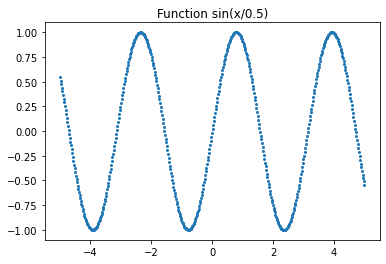

In [8]:
import numpy as np
import matplotlib.pyplot as plt

xy_dict = np.load('xydata.npz')
x = xy_dict['x']
y = xy_dict['y']

#Plot of the results
plt.plot(x, y, 'o', linewidth=1.0, markersize=2)
plt.title(f'Function sin(x/{L})')
plt.show()

## Exercise 4

Create a random number matrix (as numpy array). 

Create a function to save the matrix to a `.txt` file using `open()` with a desired delimiter (say `','`, inputed as argument). Use it to save the matrix to `'.txt'`.

Save it as well to a `.npy` file using `np.save()`. 

Then create one function that using `open()` reads a desired row of the `.txt` file that has a matrix saved (given a particular delimiter and datatype) and returns it in array format. Another function should do the same for the `.npy` file.

Ask the user for a the line to be extracted and the `.txt` and `.npy` file paths and print the results. Ask it until the correct existence requirements are satisfied.

#### Possible solution

In [1]:
import numpy as np

n = 30 #n rows and n cols
matrix = np.random.randint(low = 10, high = 99, size = (n,n)) #creation of a random n x n integer matrix

#For txt file
def save_to_txt(file_name, matrix, delimiter):
    with open(file_name,"w") as fileHandle:
        for row in matrix:
            out_line = ""
            for i, element in enumerate(row):
                out_line += str(element)+delimiter
            fileHandle.write(out_line[:-1]+"\n")            

save_to_txt("data.txt", matrix, ",")
            
#For npy file
np.save("data.npy",matrix)

In [2]:
def load_row_from_txt(file, line, delimiter, dtype):
    try:
        with open(file,"r") as fileHandle: 
            row_as_string_elements = fileHandle.readlines()[line][:-1].split(delimiter)
            row = np.array([dtype(element) for element in row_as_string_elements])
            return row

    except IOError:
        print("File not found or incorrect format. Try again.")
        return None

def load_row_from_npy(file, line):
    try:
        row = np.load(file)[line]
        return row

    except IOError:
        print("File not found or incorrect format. Try again.")
        return None
        

Function calls:

In [3]:
row_txt=None
row_npy=None

while row_txt is None and row_npy is None:
    line = int(input("Line to be extracted:"))
    file_txt = input("Name of .txt file:")
    file_npz = input("Name of .npy file:")

    row_txt = load_row_from_txt(file_txt, line, ',', int)
    row_npy = load_row_from_npy(file_npz, line)


print("\nResults:\n")
print('txt: ',row_txt)

print('npy: ',row_npy)

Line to be extracted:4
Name of .txt file:data.txt
Name of .npy file:data.npy

Results:

txt:  [56 59 89 84 63 30 30 79 97 93 18 71 68 37 41 80 39 16 37 95 22 52 63 88
 33 29 90 49 90 70]
npy:  [56 59 89 84 63 30 30 79 97 93 18 71 68 37 41 80 39 16 37 95 22 52 63 88
 33 29 90 49 90 70]


# Exercise 5: Process the Data Taken in the Lab
In this exercise we will simulate the data processing that experimental sciences require after an experiment. We will imagine that you have taken some measurements by hand in an excel file (the attached file `Lab_Data.xlsx`), and a machine has generated some measurements for three replicas of the experiment, each in a text file (the attached files `Replica_1.txt`, `Replica_2.txt`, `Replica_3.txt`). The excel file has two columns, with the variables `x_1,x_2,y_1`, while the text file has its numbers separated by commas in two columns, `x_3,y_3`. 

In order to give this a bit of context you can imagine that `x_1,x_2` are voltage measurements that you took with a voltmeter and `y_1` are current values you took with an ammeter. Then, `x_3,y_3` are the time in minutes and the absorbance measured by an automatic spectrophotometer for the three replicas of the same material or chemical reaction or nanoparticle internatization technique you are developing.

The error in the measurements of `x_1` and `x_2` is $\sigma_{x_1}=0.01$ and $\sigma_{x_2}=0.1$.

You are given the next formulas
\begin{equation*}
y_1=\frac{A}{20}x_1^3+B\sqrt{x_2}+C
\label{eq:1} \tag{1}
\end{equation*}

\begin{equation*}
y_2=-12x_1^{1/4}+x_1\sqrt{x_2}+3
\label{eq:2} \tag{2}
\end{equation*}

\begin{equation*}
 ln(y_3)=\ Dx_3+E
\label{eq:3} \tag{3}
\end{equation*}

and the error formula obtained by error propagation for $y_2$,
\begin{equation*}
\sigma_{y_2}=\sqrt{\Big(-2x_1^{-3/4}-\sqrt{x_2}\Big)^2\sigma_{x_1}^2+\Big(\frac{1}{2}x_1x_2^{-1/2}\Big)^2\sigma_{x_2}^2}
\label{eq:4} \tag{4}
\end{equation*}

Your task will be to create three plot `.png` files showing the results required by the lab leader. To make the exercise easier, let me give you the steps to follow one by one with some tips. This is just an exercise so you can practice the knowledge of the last two lectures and hopefully get rid of the fear to use Python in a lab practice!

**TASK 1: Import Data to Python Numpy Arrays**:

- Import the Excel data into three different 1D numpy arrays (vectors) of names `x_1`, `x_2`, `y_1`.

*TIP: Use the trick to convert it to a dictionary of lists with `pd.read_excel()`, as seen in Lecture 3. Then, convert those lists to arrays*.

- Import the three `.txt` files gathering `x_3` (which is the same in all three files, e.g. the time measured by the machine's internal clock) and `y_3` (the measured absorbance), into 1D numpy arrays.

*TIP: There are alternative ways to do this, but for example, use `open(, 'r')` to open each file, then discard the first line (containing the headers), and for the rest in a loop, read one line, split it by commas and append the number you are interested on into a list (you will need to convert the strings to floats!). Finally convert the list into an array.*

**TASK 2: Calculate Missing Numbers (except $A,B,C,D,E$)**

- Compute $y_2$ using the formula \eqref{eq:2} and compute the error $\sigma_{y_2}$ for each of its values using equation \eqref{eq:4}. Save them into vector numpy arrays for example.

*TIP: Use element-wise numpy operations! Arrays can be added, subtracted etc*

- Compute the **average** $y_3$ for each $x_3$ (remember you have three $y_3$ vectors) and their **standard deviation** or error. Save them to numpy arrays.

*TIP: Remember that numpy gives us the mean and standard deviation functions which we can use if the three versions of $y_3$ are placed as columns in a matrix for example!*

**TASK 3: Compute the Best Fits to get $A,B,C,D,E$**

- Interpolate the best surface obeying an equation like \eqref{eq:1}, using the observed data. The best linear regression for instance will give you some predicted values of $A,B,C$.

- Interpolate the best line obeying the equation \eqref{eq:3}, using the average $y_3$.

**You should obtain something close to:**
                    $$
                    A=1,\ B=10.5,\ C=3,\ D=0.7,\ E=3$$

*TIP/Example of how to do this!: (a) Use the Function you implemented in the previous lecture's exercises, or (b) use one implemented by somebofy. If you opt for (b): Imagine you had vectors `x_1`, `x_2` and `y` of length `N`, you find in stack-overflow that in order to fit the best coefficients $a,b,c,d$ for the equation $y^3=a e^{x_1}+b x_1^{7}+c \frac{x_1}{\sqrt{x_2}}+d$ you can do the following:*

        from sklearn import linear_model
        
        # select what data against what will be fitted
        X_data_to_fit = np.array([ np.exp(x_1), x_1**7, x_1/np.sqrt(x_2) ]).T    # array [N,3]
        Y_data_to_fit = y**3     # array [N]
        
        # fit the best function
        reg = linear_model.LinearRegression().fit(X_data_to_fit, Y_data_to_fit)
        
        # extract the coefficients
        abc = reg.coef_          # a list of 3 best coefficients, (a,b,c)
        d = reg.intercept_       # a single best coefficient (d)
        
*Now I can interpolate any value of `y(x_1,x_2)`. For example even if `N=10`, I can now take a list of `M=200` points from the minimum of `x_1` to its maximum and the same for `x_2`, and I will have their corresponding predicted `y` as*
        
        new_x1 = np.linspace( min(x_1), max(x_2), 200 ) # 1d array of [200]
        new_x2 = np.linspace( min(x_2), max(x_2), 200 ) # 1d array of [200]
        X1_grid, X2_grid = np.meshgrid( new_x1, new_x2 )  # 2d arrays of [200, 200]
        interpolated_Y_grid = ( abc[0]*np.exp(X1_grid) + abc[1]*X1_grid**7 + 
                                        abc[2]*X1_grid/np.sqrt(X2_grid)+d )**(1/3) 
                                        # 2d array of corresponding y [200,200] (aka the graph)
                                        
**Explanation:** What you have done is a multi-dimensional line fit $z=a_0+a_1w_1+a_2w_2+a_3w_3$, using the typical least squares you use to fit a line, but generalized for hyperplanes. The maths are easy, and you could have implemented it yourself as well, as done in the exercises of the previous lecture.
        
**TASK 4: Generate some points for the interpolated data**

- Over a grid from the minimum of `x_1` to the maximum of `x_1` and from the minimum of `x_2` to maximum of `x_2`, obtain the values of $y_1$ using the coefficients `a,b,c`.


- From the minimum of `x_3` to its maximum, sample some values of $y_3$ using the coefficents `d,e`.

**TASK 5: Plot the results and save them as `.png` images**

- Create a new directory named `Figures` using the `os` library.


- Create a figure with three subfigures that will be similar to
<img src="https://raw.githubusercontent.com/LLACorp/Python-Course-for-Scientific-Programming/master/EXERCISES/Figures/from_excel.png" alt="Drawing" style="width: 800px;"/>


- Create another figure, with three subfigures similar to
<img src="https://raw.githubusercontent.com/LLACorp/Python-Course-for-Scientific-Programming/master/EXERCISES/Figures/machine.png" alt="Drawing" style="width: 800px;"/>


**Posible Solution**

Found: A=0.995, B=10.4, C=2.71
Found: D=0.689, E=3.03


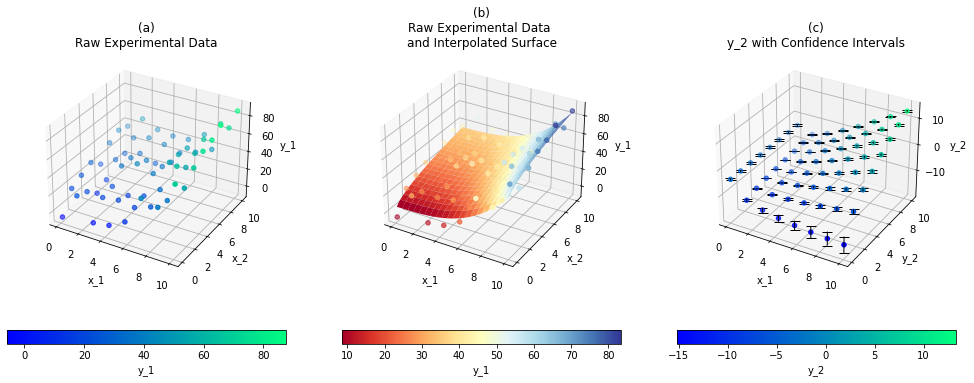

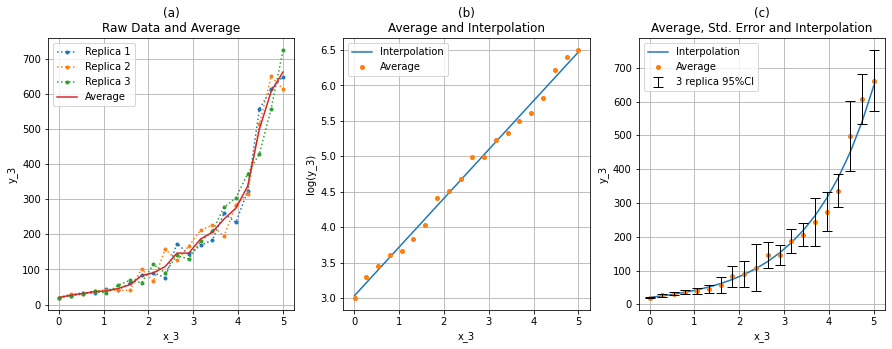

In [2]:
# TASK 1 #####################################################################
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import linear_model


# IMPORT EXCEL DATA
lab_data_dict = pd.read_excel("./Data/Lab_Data.xlsx").to_dict(orient='list')
x_1 = np.array(lab_data_dict["x_1"])
x_2 = np.array(lab_data_dict["x_2"])
y_1 = np.array(lab_data_dict["y_1"])

# IMPORT TXT DATA BY MACHINE
# we count the number of lines in the replica txt files to initialize empty vectors for y3
with open(f"./Data/Replica_1.txt", "r") as f:
    N=len(f.readlines())-1 # the first line is just the titles

y_3 = { "Replica1":np.zeros(N), "Replica2":np.zeros(N), "Replica3":np.zeros(N)}
x_3 = np.zeros(N)

# for each file
for k in range(3):
    with open(f"./Data/Replica_{k+1}.txt", "r") as f:
        f.readline() # we just discard this line
        for i, line in enumerate(f.readlines()):
            entries = line.split(",")
            x_3[i] = float(entries[0])
            y_3[f"Replica{k+1}"][i] = float(entries[1])
            
# TASK 2 #############################################################################

# CALCULATE y2 and sigmay2
y_2 = -12*x_1**(1/4)+np.sqrt(x_2)*x_1+3

sigma_x1 = 0.01
sigma_x2 = 0.1
sigma_y2 = np.sqrt( (-3*x_1**(-3/4)-np.sqrt(x_2))**2*sigma_x1**2+(0.5*x_2**(-1/2)*x_1)**2*sigma_x2**2 )

# CALCULATE AVERAGE AND STDV for y3
matrix_y = np.array([y_3["Replica1"], y_3["Replica2"], y_3["Replica3"]]).T
y_3_av = np.mean(matrix_y, axis=1)
y_3_std = np.std(matrix_y, axis=1)

# TASK 3 ##############################################################################

# INTERPOLATE BEST FUNCTION FOR A,B,C
# gather the support points in a same matrix
X_data = np.array([x_1**3/20, np.sqrt(x_2)]).T
# compute the regression y_1 = A/20 x_1^3 + B sqrt(x_2) + C
reg = linear_model.LinearRegression().fit(X_data, y_1)
# extract the coefficients
AB = reg.coef_ #[A,B] list
C = reg.intercept_
print(f"Found: A={AB[0]:.3}, B={AB[1]:.3}, C={C:.3}")

# INTERPOLATE BEST LINE FOR D,E 
# gather support points in a same matrix
X = np.array([x_3]).T
# run regression log(y_3) = D x_3 + E
reg = linear_model.LinearRegression().fit(X, np.log(y_3_av))
# results
D = reg.coef_[0] # D
E = reg.intercept_ # E
print(f"Found: D={D:.3}, E={E:.3}")


# TASK 4 ########################################################################

# GENERATE SOME POINTS OF THE INTERPOLATING PLANE
num_points=40
# create a grid over which to plot
X_1,X_2 = np.meshgrid(np.linspace(min(x_1), max(x_1), num_points),
                      np.linspace(min(x_2), max(x_2), num_points))
interpolated_y2 = AB[0]*X_1**3/20+ AB[1]*np.sqrt(X_2) + C


# GENERATE SOME POINTS OF THE INTERPOLATING LINE
interpolated_y3 = np.exp(D*x_3+E)


# TASK 5 ########################################################################
os.makedirs("./Figures", exist_ok=True)

# PLOT PLANES ETC
fig = plt.figure(figsize=(17,6))
ax1 = fig.add_subplot(131, projection='3d')
cb=ax1.scatter3D(x_1, x_2, y_1, c=y_1, cmap='winter')
ax1.set_xlabel("x_1")
ax1.set_ylabel("x_2")
ax1.set_zlabel("y_1")
ax1.set_title("(a)\nRaw Experimental Data")
fig.colorbar(cb, ax=ax1, location="bottom", label="y_1")

ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter3D(x_1, x_2, y_1, c=y_1, cmap='RdYlBu', label="Raw Data")
cb=ax2.plot_surface(X_1, X_2, interpolated_y2, rcount=25, ccount=25,
                cmap='RdYlBu', label="Interpolated Surface")
ax2.set_xlabel("x_1")
ax2.set_ylabel("x_2")
ax2.set_zlabel("y_1")
ax2.set_title("(b)\nRaw Experimental Data \nand Interpolated Surface")
fig.colorbar(cb, ax=ax2, location="bottom", label="y_1")

ax3 = fig.add_subplot(133, projection='3d')
cb=ax3.scatter3D( x_1, x_2, y_2, c=y_2, cmap='winter')
ax3.errorbar(x_1, x_2, y_2, zerr=1.96*sigma_y2, fmt='none', ecolor='black', capsize=5, elinewidth=1) # plot the error-bars
ax3.set_xlabel("x_1")
ax3.set_ylabel("y_2")
ax3.set_zlabel("y_2")
ax3.set_title("(c)\ny_2 with Confidence Intervals")
fig.colorbar(cb, ax=ax3, location="bottom", label="y_2")
plt.savefig("./Figures/from_excel.png")
plt.show()

# PLOT MACHINE THINGS  ################################################
fig=plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)

ax1.plot(  x_3, y_3["Replica1"], 'o:', markersize=3, label="Replica 1")
ax1.plot(  x_3, y_3["Replica2"], 'o:',  markersize=3, label="Replica 2")
ax1.plot(  x_3, y_3["Replica3"], 'o:', markersize=3, label="Replica 3")
ax1.set_title("(a)\nRaw Data and Average")
ax1.set_xlabel("x_3")
ax1.set_ylabel("y_3")
ax1.plot( x_3, y_3_av, label="Average" )
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(132)
ax2.plot(  x_3,np.log(interpolated_y3) , '-', label="Interpolation")
ax2.set_title("(b)\nAverage and Interpolation")
ax2.set_xlabel("x_3")
ax2.set_ylabel("log(y_3)")
ax2.plot(  x_3,np.log(y_3_av), 'o', label="Average",markersize=4 )
ax2.legend()
ax2.grid()

ax3 = fig.add_subplot(133)
ax3.plot(  x_3, interpolated_y3, '-', label="Interpolation")
ax3.set_title("(c)\nAverage, Std. Error and Interpolation")
ax3.set_xlabel("x_3")
ax3.set_ylabel("y_3")
ax3.plot( x_3, y_3_av, 'o', label="Average", markersize=4 )
ax3.errorbar(x_3, y_3_av, yerr=1.96*y_3_std, fmt='none', 
             ecolor='black', capsize=5, elinewidth=1,label="3 replica 95%CI") # plot the error-bars
ax3.legend()
ax3.grid()
plt.savefig("./Figures/machine.png")
plt.show()

# Exercise 6: Creating a GIF animation using different Images

We acknowledged in the previous lecture's exercises that when simulations got heavy, trying to watch them live was problematic. Instead, what we could do is to save all the frames generated by the simulation in a temporary directory, and only after the simulation has ended, generate an animation (say a `gif` "moving image") with a desired frame-rate.

Matplotlib itself has a way to generate animations efficiently. However, it is quite cumbersome for beginners. Instead, there are some other libraries like `imageio` that provide us the most comfortable and direct solutions. For instance, `imageio` has a function called `mimsave()`, which lets us input as arguments:
- A path for the output gif.


- A list of the composing images for the animation (ordered as we want them to be ordered in the animation). They must be in 2D numpy array form. But how can we get an image we have in disk, say `'image1.png'` in matrix form? There are plenty of functions for that. One of them is `imageio` library's `imread()`. Input the path of an image and it will output the image in a numpy array. Ex: `my_image = imageio.imread('image1.png')`. If it is a coloured image, the array will have three axes: the height, the width and the three color channels. (such an array can be directly plot with `plt.imshow()`).


- The number of frames per second to output **or** the duration of each frame in seconds (in case we want some frame to be shown for longer than the rest, for instance).

In order to use this function, you will first need to import the `imageio` library with `import imageio`. If your Anaconda distribution did not carry it already, you can install it with the following line in Jupyter:

`!pip install imageio`

or just `pip install imageio` in a terminal. (It turns out that if you write a `!` sign in front of a code line in Jupyter Notebook -not in a python script in general-, the next line will be executed in the underlying terminal that is interpreting the notebook!).

Then, as an example, if you have the following paths of images in a list `image_paths =['image1.png', 'image2.png', './subfolder/image3.png']`, you can generate a gif called `my_animation.gif` as:

        images = [imageio.imread(im) for im in image_paths]
        imageio.mimsave('my_animation.gif', images, fps=1)

which would generate a gif that has a length of 3 seconds, where we see only one frame per second. If instead, we want each frame to have a certain length we can do:

`imageio.mimsave('my_animation.gif', images, duration=[2, 0.5, 1])`

The first frame will be shown for 2 seconds, then the second for half a second and the third for a whole second (a total of 3.5 seconds).

**Exercise:** Take the Schrödinger Equation simulator from the previous lecture's exercises and generate a gif animation as the output. For this, create a directory, call it `temp`, and save the figures there (remember the `plt.savefig(path)` function to save plots to memory as images). When the simulator is done, run the gif generation, when it is done, remove all the images in the `temp` directory and remove the `temp` folder itself, all automatically.

#### Possible Solution

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import os
import imageio

# User parameter declaration:

dt=0.000001
N=300
last_time=2
L=10.0
plotEvery=8000

def f(x, mu0=2.2, sigma=0.6, k0=0.0): # initially the particle will be a still gaussian distribution
    return (1/(np.pi*sigma**2))**(1/4)*np.exp(1j*k0*x-(x-mu0)**2/(2*sigma**2))

def V(x): # we will try a harmonic potential
    return 10*(x-(L/2))**2

In [28]:
def one_Quantum_Particle_in_1d_Simulator(dt, N, last_time, L, f, V, plotEvery, fps=10, dpi=150):
    # Create the temp folder to save the images
    os.makedirs("./temp/", exist_ok=True)
    image_paths = []
    
    # Define the Planck Constant and the mass of the particle
    hbar=1
    m=1
    
    # Compute the spatial grid width
    dx = L/N
    
    # Compute the x points
    x = np.array([ j*dx for j in range(0,N+1)])
    
    # Compute the potential energy in those points
    pot = np.array([ V(xk) for xk in x])
    
    # Initialize the psi array for the first iteration
    psi_0 = np.array([ f(xk) for xk in x])
    
    # Initialize the array psi for the next iterations as a zeros array
    psi_1 = np.zeros(psi_0.shape, dtype=np.complex) # note that the first and last positions are always 0
    
    # Initialize time counter
    t=0
    iteration=0
    print("Generating simulation plots...")
    
    while t<last_time:
        # update time
        iteration+=1
        t=iteration*dt
        
        # Compute the temperatures for this new time at each position of the grid
        # Note that we dont need to change the value of the boundaries
        psi_1[1:N] = (1-1j*dt/hbar*pot[1:N]-1j*dt*hbar/(m*dx**2))*psi_0[1:N] + 1j*hbar*dt/(2*m*dx**2)*( psi_0[2:] + psi_0[:(N-1)] )
        
        # You could also have done it using for loops instead of treating them as vectors,
        # but that will be slower to compute. Try it though, it's a good practice.
        
        # Now, let us plot this time iteration
        
        if(iteration%plotEvery==0):           
            new_image_path = f'./temp/schrodingerEvolution_time_{t}.png'
            plot_wavefunction_and_potential_and_save_it(psi_1, pot, x, t, N, dt, \
                            saving_path=new_image_path, dpi=dpi)
            image_paths.append(new_image_path)
            # print(f"Time {t:3.2}/{last_time} computed!")
            
        # Swap what we previously called previous iteration
        psi_0 = psi_1
    
    print("Generating GIF...")
    images_for_animation = [ imageio.imread(image_path) for image_path in image_paths]
    imageio.mimsave('Schrodinger_Eqt_Simul.gif', images_for_animation, fps=fps)
    
    print("Erasing mess...")
    for image_path in image_paths:
        os.remove(image_path)
    os.rmdir('./temp/')
    print("\nDone!!")
    
        
def plot_wavefunction_and_potential_and_save_it(psi, pot, x, t, N, dt, saving_path, dpi):
    # Compute the probability density
    probability = np.abs(psi)**2

    # Clear previous plots
    plt.clf()
    
    # Plot
    plt.plot(x, probability, '-', label=f'Probability(x,time={round(t,4)})', markersize=1.5) # plot the probability
    plt.plot(x, np.real(psi), '-', label=f'Real part', markersize=1.5) # plot the real part
    plt.plot(x, np.imag(psi), '-', label=f'Imaginary Part', markersize=1.5) # plot the imaginary part

    plt.ylim(-1.6,1.6)
    plt.xlabel('Position x')
    plt.ylabel('Probability Density |psi|**2')
    plt.legend()

    # In order to have the potential energy in a differnet y axis we use twinx
    plt.twinx()
    plt.plot(x, pot, '-', label=f'Potential Energy', markersize=1, color='grey') # plot the potential
    plt.ylabel('Potential Energy')

    plt.legend() # to show the labels of the plots
    plt.title(f'Time Evolution for Quantum Particle using\n N={N} points in space and time step dt={dt}')

    plt.savefig(saving_path, dpi=dpi) # choose the resolution of the images with dpi


Generating simulation plots...
Generating GIF...
Erasing mess...

Done!!


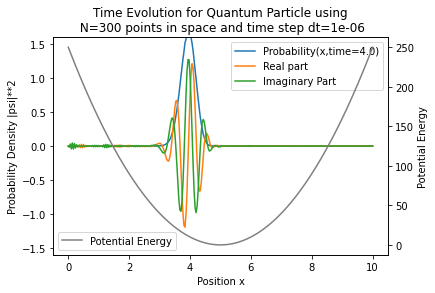

In [29]:
one_Quantum_Particle_in_1d_Simulator(dt, N, last_time, L, f, V, plotEvery)

# Exercise 7: Cool 3 Body Simulation Initial Conditions

As you could verify by testing different initial conditions in the last lecture's exercises, it is hard to find harmonious configurations. In fact, this is still today an active field of research (looking for solutions of the three body problem of classical Newtonian gravity and their stability). In the following page, its author gives us some datasets with specially interesting initial conditions with their names and authors, even links to the original papers:

https://observablehq.com/@rreusser/periodic-three-body-initial-conditions

We have downloaded the dataset in a so called `json` format. This is a very standard format for datasets to be used in multiple programming languages. In python they can be read as dictionaries using the `json` library, as we saw in the theory lectures. In order to load a `json` file's content to a Python dictionary, after importing the `json` library, we can use the function `load`. For this, we must first open the file in read mode, get its file-handle and give it to the function, like this:

    input_file = open("myfile.json", "r")

    data_dictionary = json.dump(input_file)

    input_file.close()

And then the data will be in `data_dictionary`. In fact if you open the `.json` file with a text reader directly, you will notice that it has exactly the shape of a python dictionary! This is not just a coincidence obviously.

Open `threeBodyInitialConditions.json` in dictionary form. Look at its structure, it is a dictionary of dictionaries. It is classified by researchers, then the name of the initial condition type, then the mode, and then there is the information of the initial conditions: a link to a credit page, the discovery year etc., but most importantly for us, the initial $\vec{x}$ and $\vec{v}$ coordinates.

**Exercise**: First, write a GIF generating version of the N body simulator of the previous lecture's exercises. Then, import the `json` and print a menu (using prints and inputs) showing the user the possible authors, condition types and modes in the dictionary and allowing her/him to choose the desired mode. Then the code should run the simulator with those conditions and output the gif.

Note that these $N=3$ body initial conditions are given for 2D simulations, and ours are 3D. That is, they are given as `'x' : [[1.5, 0], [0.4, 0.5], [0.1, 0.3]]`, which means we need to add an extra column (with zeros for example) for our simulations.

Also, note that these initial conditions are so refined that many are quite unstable, which means that numerical error will build up fast. Therefore, with our simple method to solve the differential equation, you will need to put the time step $\Delta t$ veery small to see harmonious results!

### Possible Solution for the Generation of GIFs with the N Body simulator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import imageio
import os

def run_N_Body_simulator(N, positions_now, velocities_now, masses, additional_parameters,
                    force_list, t0, tf, timeIts, plotEvery, limits, J_trace, exp_name="", dpi=150, fps=10):
    os.makedirs("./temp", exist_ok=True)
    image_paths= []
    
    # Compute the times in which the simulator will compute a step:
    times = np.linspace(start=t0, stop=tf, num=timeIts)
    # Get time increment delta t
    dt = times[1]-times[0]
    
    positions = np.zeros((J_trace, positions_now.shape[0], positions_now.shape[1]))
    positions[:] = positions_now # copy the same position in all J
    
    masses_inv = 1/np.array(masses)
    
    print("Generating images...")
    for it, t in enumerate(times):
        # a Nx3 array (matrix) where we will save the forces in each time
        forces = np.zeros(positions_now.shape)
    
        # Step 1, compute the total force on each particle
        for k, xk in enumerate(positions[0]):
            for j, xj in enumerate(positions[0]): # each of the other particles
                if j!=k: # does not self-interact!
                    for force in force_list:
                        forces[k,:] += force(xk, xj, masses[k], masses[j], additional_parameters[k], additional_parameters[j])
        
        # Step 2, compute the velcity in the next time
        velocities_next = velocities_now + masses_inv*forces*dt
        
        # Step 3, compute the position of the particles in the next time
        # first move all the positions one step onward
        positions[1:, :, :] = positions[:-1,:,:] # copy in the slots from 1 to J the ones that were in 0 to J-1
        
        positions[0,:,:] = positions[1,:,:] + velocities_now*dt
        
        # Plot the particles
        if it%plotEvery==0:
            output_image_path = f"./temp/NBody_it_{it}.png"
            plot_N_particles_and_save_it(output_image_path, positions, velocities_next, t,
                             limits['xmin'], limits['xmax'], limits['ymin'],
                             limits['ymax'], limits['zmin'], limits['zmax'], dpi=dpi, fps=fps)
            image_paths.append(output_image_path)
        
        # prepare for the next time iteration
        velocities_now = velocities_next
        # for the position it is already prepared
    
    print("Generating GIF...")
    images_for_animation = [ imageio.imread(image_path) for image_path in image_paths]
    imageio.mimsave(f'NBody_Simulation_{exp_name}.gif', images_for_animation, fps=fps)
    
    print("Erasing mess...")
    for image_path in image_paths:
        os.remove(image_path)
    os.rmdir('./temp/')
    print("\nDone!!")
    

def plot_N_particles_and_save_it(output_image_path, positions, velocities, t,
                                 xmin=-1, xmax=1, ymin=-1, ymax=1, zmin=-1, zmax=1, dpi=150, fps=10):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111, projection='3d')
    cmap = matplotlib.cm.get_cmap('hsv') # to have the same colors of th trace and the body
    
    # Plot particles
    ax.scatter3D(positions[0,:,0], positions[0,:,1], positions[0,:,2], 
                 c=cmap(np.arange(positions.shape[1])/positions.shape[1]), s=50)
    
    # plot velocity vectors
    ax.quiver(positions[0,:,0], positions[0,:,1], positions[0,:,2], 
              velocities[:,0], velocities[:,1], velocities[:,2], length=0.2, normalize=True)
    
    
    # plot the traces
    for j in range(positions.shape[1]): # for each particle its trace separately
        ax.plot3D(positions[:,j,0], positions[:,j,1], positions[:,j,2], '-', c=cmap(j/positions.shape[1]) )
    
    
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
    ax.set_zlim((zmin, zmax))
    ax.set_title(f"{positions.shape[1]} Body simulation time t={t:4.3}")

    plt.savefig(output_image_path, dpi=dpi) # choose the resolution of the images with dpi
    # Clear figure
    plt.close(fig)

### Possible Menu solution for the user to choose the desired initial conditions for the 3 body problem

In [2]:
import json

with open("./Data/threeBodyInitialConditions.json", 'r') as file:
    initial_conds = json.load(file)
    

def ask_user_return_x_v_initial_conditions(initial_conds):
    print("Authors:\n")
    for i, author in enumerate(initial_conds.keys()):
        print(f"({i}) {author}")
    author = list(initial_conds.keys())[int(input("Choose the Author number:"))]

    print("\nConditions:\n")
    for i, cond in enumerate( initial_conds[author].keys()):
        print(f"({i}) {cond}")
    condition = list(initial_conds[author].keys())[int(input("Choose the Condition type:"))]

    print("\nMode:\n")
    for i, mode in enumerate( initial_conds[author][condition].keys()):
        print(f"({i}) {mode}")
    mode = list(initial_conds[author][condition].keys())[int(input("Choose the Mode:"))]
    
    selected_condition_dict = initial_conds[author][condition][mode]
    
    x = np.concatenate( (np.array( selected_condition_dict['x'] ), np.array([[0],[0],[0]])), axis=1 )
    v = np.concatenate( (np.array( selected_condition_dict['v'] ), np.array([[0],[0],[0]])), axis=1 )
    return x,v, f"{condition}_{mode}_{author}"

Example run:

In [3]:
def gravity_force_on_particle_1_by_2(x1, x2, m1, m2, q1, q2, G=1.0):
    '''
    x1 and x2 are expected to be arrays of 3 elements (1 dimension) or 3x1 or 1x3 
    It returns a 3 element array back (the force vector)
    '''
    unit_vector = (x2-x1)/np.linalg.norm(x2-x1) # pointing from particle 1 to 2
    return (G*m1*m2/( np.linalg.norm(x2-x1)**2 ))*unit_vector

x, v, exp_name = ask_user_return_x_v_initial_conditions(initial_conds)
run_N_Body_simulator(N=3, positions_now=x, velocities_now=v,
                    masses=[1, 1, 1], 
                    additional_parameters=[0, 0, 0], 
                    force_list=[gravity_force_on_particle_1_by_2],
                    t0=0, tf=12, timeIts=40000, plotEvery=1000,
                     limits={'xmin':-1.5, 'xmax':1.5, 'ymin':-1.5, 'ymax':1.5, 'zmin':-1.5, 'zmax':1.5},
                     J_trace=50000, exp_name=exp_name, fps=7, dpi=70)

# Try for example (0) Šuvakov -> (3) IVa - Moth I -> (0)

Authors:

(0) Šuvakov
(1) Li & Liao Equal Mass
(2) Li & Liao Unequal Mass
(3) Li & Liao Free-fall
(4) Hristov et al.
Choose the Author number:0

Conditions:

(0) I - Butterfly I
(1) II - Dragonfly
(2) III - Yin Yang
(3) IVa - Moth I
(4) IVb - Butterfly III
(5) IVc - Moth III
(6) V - Figure 8
(7) VI - Yarn
(8) VIIa - Moth
(9) VIIb - Moth
(10) VIII - Other
(11) Broucke
(12) Sheen
Choose the Condition type:12

Mode:

(0) Ovals-with-flourishes
(1) Oval, catface, and starship
(2) Hand-in-hand-in-oval
(3) Skinny pineapple
(4) PT1
(5) PT2
(6) Two-ovals
(7) Three-ovals
(8) Loop-ended-triangles
(9) Gear-inside-oval
(10) Three-bouncing
(11) Newton's-cradle
Choose the Mode:3
Generating images...
Generating GIF...
Erasing mess...

Done!!
